In [18]:
# Config
import torch
import os
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Monitoring
from tqdm.notebook import tqdm
# IO
from os.path import join, exists, basename, dirname, splitext, expanduser
from glob import glob
# Parallel processing
from joblib import Parallel, delayed
import re
from PIL import Image
import supervision as sv


from supervision.metrics import MeanAveragePrecision


from supervision.metrics.core import Metric, MetricTarget

from tempfile import mkdtemp

from ultralytics import YOLO


### map calculation set parameters carefully on by one


In [ ]:
#mention cuda device
os.environ["CUDA_VISIBLE_DEVICES"] = "3"
home_dir="/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/"
base_state = "delhi_ncr_train" ## state for which model is trained
target_state = "lucknow_ncr_test" ## state for which model is to be validated
val_state = "delhi_ncr_test" ## state for which model is to be validatd during training
model_name = "yolo11l-obb.pt" ## trained model name
task="obb" ## task for which model is trained
conf=0.001 ## confidence threshold
iou=0.50 ## iou threshold
imagsz=128 ## image size
epochs=100 ## number of epochs

# base_dir="/home/patel_zeel/kiln_compass_24/data/"

gt_image_dir= f"/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/delhi_ncr/devision_data/test/images"
gt_label_dir= f"/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/delhi_ncr/devision_data/test/labels"
print(gt_image_dir)
print(gt_label_dir)

## class information in yml file 
data_yml_save_path=mkdtemp()
data_yml = f"""train: dummy
val: dummy
nc: 3
names: ["CFCBK", "FCBK", "Zigzag"]
"""
data_yml_path = f"{data_yml_save_path}/data.yml"
with open(data_yml_path, "w") as f:
    f.write(data_yml)

print(data_yml_path)  
type="obb"
## model path
yolo_runs_dir = f"/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/runs_sentinel/{type}/labels/"
model_path ="/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/runs_sentinel/obb/train_delhi_ncr_train_val_delhi_ncr_test__obb_v4_128_512_100_val_True/weights/best.pt"
# output path
result_dir=f"{yolo_runs_dir}train_{val_state}_test_{target_state}_{task}_v1_{model_name}_{imagsz}_128_{epochs}_{conf}_{iou}/"
prediction_dir = join(result_dir,"labels")
print(result_dir)
print(prediction_dir)


/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/delhi_ncr/devision_data/test/images
/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel/delhi_ncr/devision_data/test/labels
/tmp/tmpa5338grb/data.yml
/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/runs_sentinel/obb/labels/train_delhi_ncr_test_test_lucknow_ncr_test_obb_v1_yolo11l-obb.pt_128_128_100_0.001_0.33/
/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/runs_sentinel/obb/labels/train_delhi_ncr_test_test_lucknow_ncr_test_obb_v1_yolo11l-obb.pt_128_128_100_0.001_0.33/labels


# carefull before execution 

In [52]:
# from PIL import Image
# import os
# import concurrent.futures

# # Function to convert RGBA to RGB
# def convert_rgba_to_rgb(image_path):
#     try:
#         with Image.open(image_path) as img:
#             if img.mode == 'RGBA':
#                 img = img.convert('RGB')  # Convert RGBA to RGB
#             img.save(image_path)  # Save the converted image back
#     except Exception as e:
#         print(f"Error converting {image_path}: {e}")

# # Function to process all images in parallel
# def process_images_in_parallel(image_dir):
#     # Get all image paths in the directory
#     image_paths = [os.path.join(image_dir, image_name) for image_name in os.listdir(image_dir)]

#     # Use concurrent futures for parallel processing
#     with concurrent.futures.ThreadPoolExecutor() as executor:
#         executor.map(convert_rgba_to_rgb, image_paths)

# # Directory containing images
# image_dir = '/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/sentinel_2/delhi_ncr/rgb/'

# # Process images in parallel
# process_images_in_parallel(image_dir)


In [53]:
## Supervision dataset
sv_dataset=sv.DetectionDataset.from_yolo(gt_image_dir,gt_label_dir,data_yml_path)
print(sv_dataset)
model=YOLO(model_path)
print(len(sv_dataset))
sv_dataset.classes




916


['CFCBK', 'FCBK', 'Zigzag']

In [54]:
# sv_dataset.annotations

In [55]:

targets = []
predictions = []

for name, _, gt_detection in tqdm(sv_dataset):
    file_name = splitext(basename(name))[0]
    
    ultralytics_result = model(
        name,
        imgsz=128,
        iou=0.50,
        conf=0.25,
        exist_ok=True,
        save_txt=True,
        max_det=300,
        name=result_dir,
        verbose=False
    )[0]
    
    sv_detection = sv.Detections.from_ultralytics(ultralytics_result)
    
    targets.append(gt_detection)
    predictions.append(sv_detection)

print("target length", len(targets))
print("prediction length", len(predictions))


  0%|          | 0/916 [00:00<?, ?it/s]

Results saved to /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/runs_sentinel/obb/labels/train_delhi_ncr_test_test_lucknow_ncr_test_obb_v1_yolo11l-obb.pt_128_128_100_0.001_0.33
849 labels saved to /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/runs_sentinel/obb/labels/train_delhi_ncr_test_test_lucknow_ncr_test_obb_v1_yolo11l-obb.pt_128_128_100_0.001_0.33/labels
Results saved to /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/runs_sentinel/obb/labels/train_delhi_ncr_test_test_lucknow_ncr_test_obb_v1_yolo11l-obb.pt_128_128_100_0.001_0.33
849 labels saved to /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/runs_sentinel/obb/labels/train_delhi_ncr_test_test_lucknow_ncr_test_obb_v1_yolo11l-obb.pt_128_128_100_0.001_0.33/labels
Results saved to /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/runs_sentinel/obb/labels/train_delhi_ncr_test_test_lucknow_ncr_test_obb_v1_yolo11l-obb.pt_128_128_100_0.001_0.33
849 labels saved to /home/rishabh.mondal

In [56]:
# ## mAP calculation 
# from supervision.metrics.core import MetricTarget
# MetricTarget??

In [57]:

# mAP_metric = MeanAveragePrecision(class_agnostic=True,metric_target=MetricTarget.ORIENTED_BOUNDING_BOXES)
mAP_metric = MeanAveragePrecision(class_agnostic=True)


mAP_result=mAP_metric.update(predictions,targets).compute()
class_wise_mAP=mAP_result.ap_per_class[:,0].tolist()
# print(f"mAP_result: {mAP_result}")
matched_classes=mAP_result.matched_classes.tolist()
print(f"Matched classes: {matched_classes}")

num_classes=3
final_class_wise_mAP = [0]*num_classes

for cls, mAP in zip(matched_classes, class_wise_mAP):
    print(f"cls: {cls}, mAP: {mAP}")
    final_class_wise_mAP[cls] = mAP


print(f"class_wise_mAP: {final_class_wise_mAP}")



Matched classes: [-1]
cls: -1, mAP: 0.7573371218220499
class_wise_mAP: [0, 0, 0.7573371218220499]


In [58]:
CLASSES = sv_dataset.classes
CLASSES

['CFCBK', 'FCBK', 'Zigzag']

TP_cfcbk: 5.0, TP_fcbk: 46.0, TP_zz: 985.0, TP: 1036.0
Predicted positives for cfcbk: 7.0, fcbk: 98.0, zz: 1248.0
Total predicted positives: 1353.0
Actual positives for cfcbk: 18.0, fcbk: 133.0, zz: 1202.0
Total actual positives: 1353.0

Plot of Confusion Matrix at IoU 0.5


,IoU,Precision,Recall,F1 score,TP,FP,FN,Kiln instances
0,0.5,0.765706,0.765706,0.765706,1036.0,317.0,317.0,1353.0


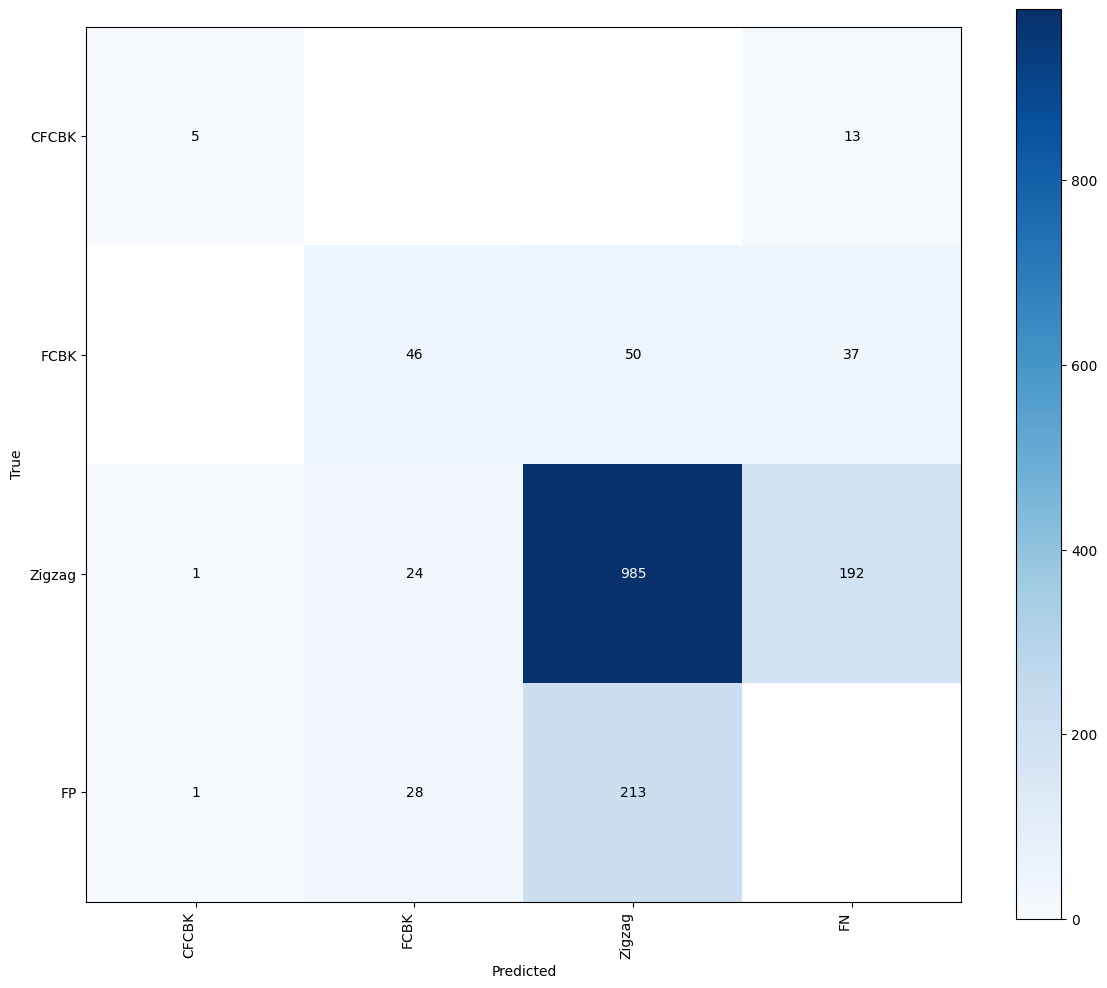

In [59]:
import pandas as pd

# Initialize an empty dataframe
df = pd.DataFrame({}, columns=['IoU', 'Precision', 'Recall', 'F1 score', 'TP', 'FP', 'FN', 'Kiln instances'])

# Iterate over different IoU thresholds
for iou in [0.50]:
    # Get the confusion matrix based on the IoU threshold
    confusion_matrix = sv.ConfusionMatrix.from_detections(
        predictions=predictions,
        targets=targets,
        classes=CLASSES,
        conf_threshold=0.25,
        iou_threshold=iou
    )

    # Extract confusion matrix (tp, fp, fn for each class)
    cm = confusion_matrix.matrix
    tp1, tp2, tp3 = cm[0][0], cm[1][1], cm[2][2]
    tp = tp1 + tp2 + tp3

    # Print TPs for each class
    print(f"TP_cfcbk: {tp1}, TP_fcbk: {tp2}, TP_zz: {tp3}, TP: {tp}")

    # Calculate predicted positives (sum of columns)
    predicted_positives_cfcbk = cm[:, 0].sum()
    predicted_positives_fcbk = cm[:, 1].sum()
    predicted_positives_zz = cm[:, 2].sum()
    predicted_positives = predicted_positives_cfcbk + predicted_positives_fcbk + predicted_positives_zz

    # Print predicted positives
    print(f"Predicted positives for cfcbk: {predicted_positives_cfcbk}, fcbk: {predicted_positives_fcbk}, zz: {predicted_positives_zz}")
    print(f"Total predicted positives: {predicted_positives}")

    # Calculate actual positives (sum of rows)
    actual_positives_cfcbk = cm[0, :].sum()
    actual_positives_fcbk = cm[1, :].sum()
    actual_positives_zz = cm[2, :].sum()
    actual_positives = actual_positives_cfcbk + actual_positives_fcbk + actual_positives_zz

    # Print actual positives
    print(f"Actual positives for cfcbk: {actual_positives_cfcbk}, fcbk: {actual_positives_fcbk}, zz: {actual_positives_zz}")
    print(f"Total actual positives: {actual_positives}")

    # Calculate Precision, Recall, and F1 score
    precision = tp / (predicted_positives + 1e-9)
    recall = tp / (actual_positives + 1e-9)
    f1_score = 2 * precision * recall / (precision + recall + 1e-9)

    # Calculate False Positives (FP) and False Negatives (FN)
    false_positives = predicted_positives - tp
    false_negatives = actual_positives - tp

    # Append results to DataFrame
    df = pd.concat([df, pd.DataFrame({
        'IoU': [iou], 
        'Precision': [precision], 
        'Recall': [recall], 
        'F1 score': [f1_score], 
        'TP': [tp], 
        'FP': [false_positives], 
        'FN': [false_negatives], 
        'Kiln instances': [actual_positives]
    })], ignore_index=True)

    # Display the confusion matrix plot
    print(f'\nPlot of Confusion Matrix at IoU {iou}')
    _ = confusion_matrix.plot()

# Display final results
display(df)


In [34]:
## mAP calculation (non-class agnostic)
print (100 * "=")
print("Class-specific mAP")
print (100 * "=")
mAP_metric = MeanAveragePrecision(class_agnostic=True)
mAP_result=mAP_metric.update(predictions,targets).compute()
matched_classes=mAP_result.matched_classes.tolist()
print(f"Matched classes: {matched_classes}")

# Extract mAP values
mAP_50_95 = mAP_result.map50_95  # mAP 50:95
mAP_50 = mAP_result.map50  # mAP 50
mAP_75 = mAP_result.map75  # mAP 75
print(f"mAP 50:95: {mAP_50_95}, mAP 50: {mAP_50}, mAP 75: {mAP_75}")

# Extract class-wise mAP values
num_classes=3
final_class_wise_mAP = [0]*num_classes
class_wise_mAP=mAP_result.ap_per_class[:,0].tolist()
for cls, mAP in zip(matched_classes, class_wise_mAP):
    print(f"cls: {cls}, mAP: {mAP}")
    final_class_wise_mAP[cls] = mAP

# Compute class-agnostic mAP
print (100 * "=")
print("Class-agnostic mAP")
print (100 * "=")
mAP_metric_agnostic = MeanAveragePrecision(class_agnostic=True)
mAP_result_agnostic = mAP_metric_agnostic.update(predictions, targets).compute()
# Extract class-agnostic mAP values
mAP_50_95_agnostic = mAP_result_agnostic.map50_95  # mAP 50:95
mAP_50_agnostic = mAP_result_agnostic.map50  # mAP 50
mAP_75_agnostic = mAP_result_agnostic.map75  # mAP 75
print(f"CA mAP 50:95: {mAP_50_95_agnostic}, CA mAP 50: {mAP_50_agnostic}, CA mAP 75: {mAP_75_agnostic}")

Class-specific mAP
Matched classes: [-1]
mAP 50:95: 0.39297636671721836, mAP 50: 0.7443462506422879, mAP 75: 0.3654431579246341
cls: -1, mAP: 0.7443462506422879
Class-agnostic mAP
CA mAP 50:95: 0.39297636671721836, CA mAP 50: 0.7443462506422879, CA mAP 75: 0.3654431579246341


### Save process


In [ ]:
import numpy as np
import pandas as pd



weights = pd.Series(np.concatenate)
print(weights)
weights = pd.Series(np.concatenate([target.class_id for target in targets])).value_counts()
print(weights)
print(f"Class Counts:\n{weights}")

# Avoid division by zero by using np.inf fallback
weight_mapping = {
    0: 1 / weights.get(0, np.inf),  # CFCBK
    1: 1 / weights.get(1, np.inf),  # FCBK
    2: 1 / weights.get(2, np.inf),  # Zigzag
}
weight_sum = sum(weight_mapping.values())

print(f"Mapping: {weight_mapping}")
print(f"Weight Sum: {weight_sum}")

# Example matched classes and their mAP scores
matched_classes = [0, 1, 2]  # Detected classes
# class_wise_mAP = [0.85, 0.75, 0.92]  # Corresponding mAP scores
print(f"Matched classes: {matched_classes}")
print(f"Class-wise mAP: {class_wise_mAP}")

# Compute weighted mAP safely
if weight_sum > 0:
    weighted_mAP = sum(
        weight_mapping.get(cls, 0) * mAP for cls, mAP in zip(matched_classes, class_wise_mAP)
    ) / weight_sum
else:
    weighted_mAP = 0  # Avoid division by zero

print(f"Weighted mAP: {weighted_mAP:.4f}")


0    <built-in function concatenate>
dtype: object
2    909
1     39
0      1
Name: count, dtype: int64
Class Counts:
2    909
1     39
0      1
Name: count, dtype: int64
Mapping: {0: 1.0, 1: 0.02564102564102564, 2: 0.0011001100110011}
Weight Sum: 1.0267411356520266
Matched classes: [0, 1, 2]
Class-wise mAP: [0.0, 0.11704280958223875, 0.32553778826925117]
Weighted mAP: 0.0033


In [3]:
import os
from pathlib import Path

# Define your paths
label_dir = Path("/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/lucknow_airshed_small/labels")
image_dir = Path("/home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/lucknow_airshed_small/images")
output_dir = image_dir.parent / "images_with_label"

# Create output directory if it doesn't exist
output_dir.mkdir(exist_ok=True)

# Get all label file names (without extension)
label_names = {label.stem for label in label_dir.glob("*.txt")}

# Symlink matching image files
for image_path in image_dir.glob("*"):
    if image_path.stem in label_names:
        target_link = output_dir / image_path.name
        if not target_link.exists():
            os.symlink(image_path, target_link)

print(f"Symlinks created in {output_dir}")


Symlinks created in /home/rishabh.mondal/Brick-Kilns-project/ijcai_2025_kilns/data/processed_data/lucknow_airshed_small/images_with_label
